In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from math import exp
import numpy as np
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

In [4]:
data =pd.read_csv('gbm-data.csv').values

In [5]:
x_train, x_test, y_train, y_test = train_test_split(data[:,1:],data[:,:1].ravel(),test_size = 0.8,random_state = 241)

In [6]:
v_func = np.vectorize(lambda y: 1/(1 + exp(-y)))

In [11]:
def calc(X, y_true, n_est):
    score = np.empty(n_est)
    df = clf.staged_decision_function(X)
    for i, y_pred in enumerate(df):
        score[i] = log_loss(y_true, v_func(y_pred))
    return score

In [12]:
learning_rate=[1, 0.5, 0.3, 0.2, 0.1]
n_est=250

      Iter       Train Loss   Remaining Time 
         1           1.0190            7.06s
         2           0.9192            6.58s
         3           0.8272            6.39s
         4           0.7834            6.27s
         5           0.7109            6.19s
         6           0.6368            6.12s
         7           0.5797            6.08s
         8           0.5610            6.04s
         9           0.5185            6.06s
        10           0.4984            6.03s
        20           0.1999            5.76s
        30           0.1313            5.50s
        40           0.0790            5.26s
        50           0.0511            5.04s
        60           0.0352            4.77s
        70           0.0245            4.50s
        80           0.0162            4.24s
        90           0.0114            3.98s
       100           0.0077            3.73s
       200           0.0002            1.24s
      Iter       Train Loss   Remaining Time 
        

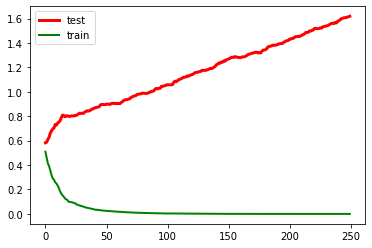

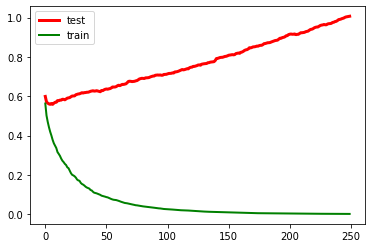

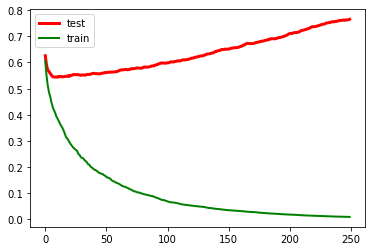

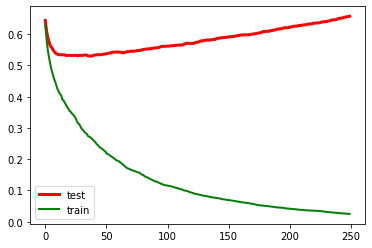

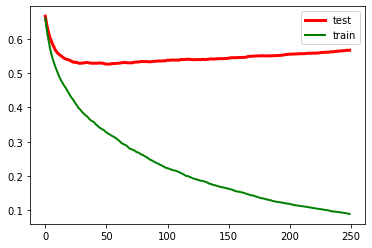

In [13]:
for lr in learning_rate:
    clf=GradientBoostingClassifier(n_estimators=n_est, verbose=True, random_state=241,learning_rate=lr)
    clf.fit(x_train,y_train)

    train_score = calc(x_train, y_train, n_est)
    test_score = calc(x_test, y_test, n_est)

    if lr == 0.2: test_score02 = test_score

    plt.figure()
    plt.plot(test_score, 'r', linewidth=3)
    plt.plot(train_score, 'g', linewidth=2)
    plt.legend(['test', 'train'])

In [14]:
test_scorePD=pd.DataFrame(data=test_score02)
test_scorePD.sort_values([0],inplace=True, ascending=True)
test_scorePD[0]=test_scorePD[0].map(lambda x: round(x,2))
print('Приведите минимальное значение log-loss на тестовой выборке и номер итерации, на котором оно достигается, при learning_rate = 0.2')
val=test_scorePD.head(1)
print(val)

Приведите минимальное значение log-loss на тестовой выборке и номер итерации, на котором оно достигается, при learning_rate = 0.2
       0
36  0.53


In [16]:
clf = RandomForestClassifier(n_estimators=val.index.values[0],random_state=241)#Конструктор случайного леса
clf.fit(x_train,y_train)

pred = clf.predict_proba(x_test)
score=log_loss(y_test, pred)

print('Какое значение log-loss на тесте получается у этого случайного леса?')
print(round(score,2))

Какое значение log-loss на тесте получается у этого случайного леса?
0.54


      Iter       Train Loss   Remaining Time 
         1           1.0190            6.20s
         2           0.9192            6.15s
         3           0.8272            6.21s
         4           0.7834            6.18s
         5           0.7109            6.14s
         6           0.6368            6.10s
         7           0.5797            6.07s
         8           0.5610            6.11s
         9           0.5185            6.15s
        10           0.4984            6.12s
        20           0.1999            5.72s
        30           0.1313            5.45s
        40           0.0790            5.30s
        50           0.0511            5.03s
        60           0.0352            4.76s
        70           0.0245            4.50s
        80           0.0162            4.25s
        90           0.0114            3.99s
       100           0.0077            3.74s
       200           0.0002            1.25s
      Iter       Train Loss   Remaining Time 
        

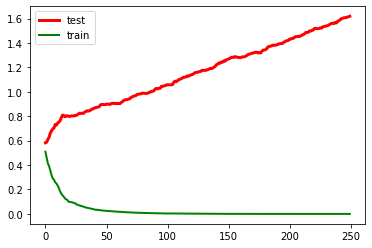

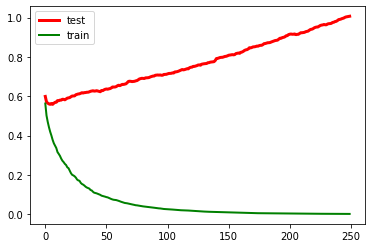

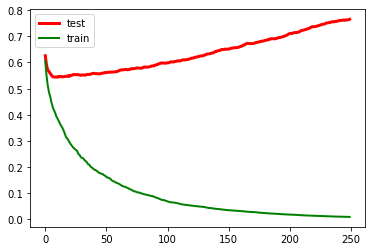

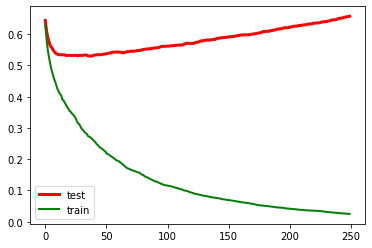

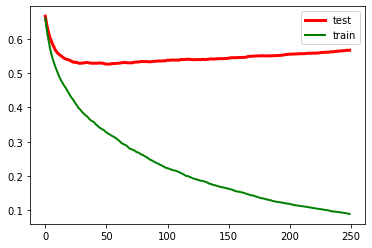

In [17]:
# -*- coding: utf-8 -*-
"""
Created on Tue Mar 14 09:54:57 2017
"""
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from math import exp
import numpy as np
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

#==============================================================================
# Загрузите выборку из файла gbm-data.csv с помощью pandas и преобразуйте ее в массив numpy (параметр values у датафрейма).
# В первой колонке файла с данными записано, была или нет реакция. Все остальные колонки (d1 - d1776)
# содержат различные характеристики молекулы, такие как размер, форма и т.д.
# Разбейте выборку на обучающую и тестовую, используя функцию train_test_split с параметрами test_size = 0.8 и random_state = 241.
#==============================================================================
data_train=pd.read_csv('gbm-data.csv').values

# Разбейте выборку на обучающую и тестовую, используя функцию train_test_split с параметрами test_size = 0.8 и random_state = 241.
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(data_train[:,1:],data_train[:,:1].ravel(),test_size = 0.8,random_state = 241)#X- начиная со второй колонки, Y - только первая колонка

del data_train

#==============================================================================
# Обучите GradientBoostingClassifier с параметрами n_estimators=250, verbose=True, random_state=241 и
# для каждого значения learning_rate из списка [1, 0.5, 0.3, 0.2, 0.1] проделайте следующее:
#==============================================================================
vfunc = np.vectorize(lambda y: 1/(1+exp(-y)))#настройка  функции для numpy array

def calc(X,y_true,n_est):
    score=np.empty(n_est)
    df=clf.staged_decision_function(X)# предсказания качества на обучающей и тестовой выборке на каждой итерации
    for i, y_pred in enumerate(df):
        score[i] = log_loss(y_true, vfunc(y_pred))#Преобразуйте полученное предсказание с помощью сигмоидной функции по формуле 1 / (1 + e^{−y_pred}), где y_pred — предсказанное значение. 1/(1+exp(-y))
    return score



learning_rate=[1, 0.5, 0.3, 0.2, 0.1]
n_est=250
for lr in learning_rate:
    clf=GradientBoostingClassifier(n_estimators=n_est, verbose=True, random_state=241,learning_rate=lr)
    clf.fit(X_train,y_train)

    train_score = calc(X_train,y_train,n_est)
    test_score = calc(X_test,y_test,n_est)

    if lr==0.2: test_score02=test_score

    plt.figure()
    plt.plot(test_score, 'r', linewidth=3)
    plt.plot(train_score, 'g', linewidth=2)
    plt.legend(['test', 'train'])

#Как можно охарактеризовать график качества на тестовой выборке, начиная с некоторой итерации: переобучение
#(overfitting) или недообучение (underfitting)? В ответе укажите одно из слов overfitting либо underfitting.
#Ответ - underfitting


#==============================================================================
# 4. Приведите минимальное значение log-loss на тестовой выборке и номер итерации, на котором оно достигается, при learning_rate = 0.2.
#==============================================================================
test_scorePD=pd.DataFrame(data=test_score02)
test_scorePD.sort_values([0],inplace=True, ascending=True)
test_scorePD[0]=test_scorePD[0].map(lambda x: round(x,2))
print('Приведите минимальное значение log-loss на тестовой выборке и номер итерации, на котором оно достигается, при learning_rate = 0.2')
val=test_scorePD.head(1)
print(val)

#==============================================================================
# 5. На этих же данных обучите RandomForestClassifier с количеством деревьев, равным количеству итераций,
# на котором достигается наилучшее качество у градиентного бустинга из предыдущего пункта, c random_state=241 и
# остальными параметрами по умолчанию.
#
# Какое значение log-loss на тесте получается у этого случайного леса?
# (Не забывайте, что предсказания нужно получать с помощью функции predict_proba.
# В данном случае брать сигмоиду от оценки вероятности класса не нужно)
#==============================================================================
clf = RandomForestClassifier(n_estimators=val.index.values[0],random_state=241)#Конструктор случайного леса
clf.fit(X_train,y_train)

pred = clf.predict_proba(X_test)
score=log_loss(y_test, pred)

print('Какое значение log-loss на тесте получается у этого случайного леса?')
print(round(score,2))